In [3]:
#Bibliotecas
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn import svm
from sklearn.datasets import make_blobs
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score

In [4]:
#Cria conjunto de dados
                    #pontos     #cclasses
X, y = make_blobs(n_samples=40, centers=2, random_state=6)

In [5]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.4, stratify=y, random_state=3)

In [6]:
modelo = svm.SVC(kernel='linear')

In [7]:
modelo.fit(X_train, y_train)

SVC(C=1.0, break_ties=False, cache_size=200, class_weight=None, coef0=0.0,
    decision_function_shape='ovr', degree=3, gamma='scale', kernel='linear',
    max_iter=-1, probability=False, random_state=None, shrinking=True,
    tol=0.001, verbose=False)

In [15]:
y_pred = modelo.predict(X_test)
accuracy_score(y_test, y_pred)


1.0

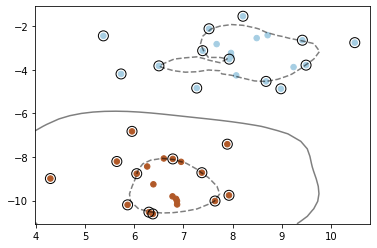

In [19]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn import svm
from sklearn.datasets import make_blobs


# criamos 40 pontos separáveis
X, y = make_blobs(n_samples=40, centers=2, random_state=6)

# ajustar o modelo, não regularizar para fins de ilustração
#clf = svm.SVC(kernel='linear', C=1000)
clf = svm.NuSVC(gamma='auto')
clf.fit(X, y)

plt.scatter(X[:, 0], X[:, 1], c=y, s=30, cmap=plt.cm.Paired)

# traçar a função de decisão
ax = plt.gca()
xlim = ax.get_xlim()
ylim = ax.get_ylim()

# criar grade para avaliar o modelo
xx = np.linspace(xlim[0], xlim[1], 30)
yy = np.linspace(ylim[0], ylim[1], 30)
YY, XX = np.meshgrid(yy, xx)
xy = np.vstack([XX.ravel(), YY.ravel()]).T
Z = clf.decision_function(xy).reshape(XX.shape)

# limite de decisão e margens do gráfico
ax.contour(XX, YY, Z, colors='k', levels=[-1, 0, 1], alpha=0.5,
           linestyles=['--', '-', '--'])
# vetores de suporte de plotagem
ax.scatter(clf.support_vectors_[:, 0], clf.support_vectors_[:, 1], s=100,
           linewidth=1, facecolors='none', edgecolors='k')
plt.show()